<img src = 'https://imageup.ru/img123/4112832/snimok-ekrana-2022-12-14-v-105943.jpg' width='1500' margins='0' >

In [1]:
import pandas as pd
import numpy as np
import math

#Библиотеки для вывода Графиков
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.tree import plot_tree
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from IPython.display import Image
import graphviz

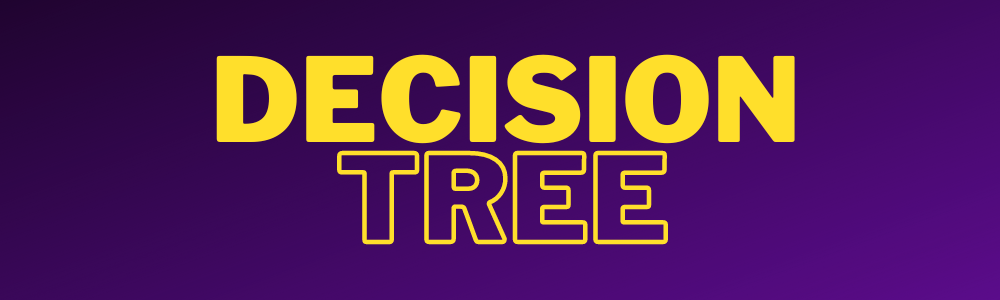

In [2]:
Image(filename='tree.png')

1. Определение
2. Жадный поиск
3. Энтропия. Проблема и решение
4. Гиперпараметры
5. Плюсы и минусы
6. Применение

# 1. Определение


Решающее дерево - это разновидность логического алгоритма

Дерево решений представляет собой иерархическую древовидную структуру, состоящую из правила вида «Если …, то ...». Модели хороши наглядностью принятия решений, потому что правила легко выразить естественным языком

Дерево состоит из: 
* Узлов (Nodes), содержащих некое правило и
* Листьев (Leafs), содержащих множество решений, удовлетворяющих всем условиям в ветке до данного листа

Узел становится листом в двух случаях:
1. естественным образом — когда он содержит единственный объект или объект только одного класса;
2. после достижения заданного условия остановки алгоритм — например, минимально допустимое число примеров в узле или максимальная глубина дерева.

В основе построения лежат «жадные» алгоритмы
То есть при выборе одного атрибута и произведении разбиения по нему на подмножества, алгоритм не может вернуться назад и выбрать другой атрибут, даже если это даст лучшее итоговое разбиение.

https://www.youtube.com/watch?v=H-xIuocK4oY

__курс от ФКН ВШЭ__

# 2. Жадный алгоритм

Жадный алгоритм:
1. Поместить в корень всю выборку R1=X
2. Запустить построение из корня: SplitNode(1,R1)

SplitNode(m,Rm)
1. Если выполнен критерий останова, то выход
2. Ищем лучший предикат: j,t=arg min Q(Rm,j,t)
3. Разбиваем с его помощью объекты на Rl и Rr
4. Повторяем для дочерних вершин: SplitNode Rl и SplitNode Rr

Сплит для номинативных данных делается для каждого уникального значения

# 3. Энтропия

Энтропия:

$$E = -\sum_{i=1}^n p_i*log_{2}p_i$$

Information Gain:

<img src='https://habrastorage.org/getpro/habr/upload_files/bb3/254/c96/bb3254c9626a88d5210568d3dc6549f8' width=300 >

где Info(S) — информация до разбиения, Info(Sa) — информация при разбиении атрибута A.

Проблема критериев заключается в том, что он показывает лучшую энтропию в случае выраженного дисбаланса классов.

#### Пример
ББББББ ЧЧЧЧЧЧ

* 1 разделение: БББББЧ      ___  БЧЧЧЧЧ
* 2 разделение: ББББББЧЧЧЧЧ  ___ Ч

In [131]:
def enthropy (n0, n1):
    return -sum((n0 * math.log2(n0), (n1 * math.log2(n1))))    

In [132]:
enthropy(6/12, 6/12)

1.0

In [133]:
enthropy(5/6, 1/6) + enthropy(1/6, 5/6)

1.3000448432967082

In [134]:
enthropy(6/11, 5/11) + enthropy(1,1)

0.9940302114769565

#### Критерий информативности

Добавляет коэффициент веса для балансировки размеров результирующих подмножеств

In [135]:
(6/12) * enthropy(5/6, 1/6) + (6/12) * enthropy(1/6, 5/6)

0.6500224216483541

In [136]:
(11/12) * enthropy(6/11, 5/11) + 1 * enthropy(1,1)

0.9111943605205434

# 4. Гиперпараметры

criterion='gini',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0

Гиперпараметры применяются для устранения проблемы переобучения. Они позволяют устанавливать пределы обучения дерева с помощью указания максимальной глубины ветвления или минимального кол-ва объектов в каждом листе

# 5. Плюсы и минусы

Преимущества:
* Формируют четкие и понятные правила классификации. То есть деревья решений хорошо и быстро интерпретируются.
* Способны генерировать правила в областях, где специалисту трудно формализовать свои знания.
* Легко визуализируются, то есть могут «интерпретироваться» не только как модель в целом, но и как прогноз для отдельного тестового субъекта (путь в дереве).
* Быстро обучаются и прогнозируют.
* Не требуется много параметров модели.
* Поддерживают как числовые, так и категориальные признаки.

Недостатки:
* Деревья решений чувствительны к шумам во входных данных. Небольшие изменения обучающей выборки могут привести к глобальным корректировкам модели, что скажется на смене правил классификации и интерпретируемости модели.
* Разделяющая граница имеет определенные ограничения, из-за чего дерево решений по качеству классификации уступает другим методам.
* Возможно переобучение дерева решений, из-за чего приходится прибегать к методу «отсечения ветвей», установке минимального числа элементов в листьях дерева или максимальной глубины дерева.
* Сложный поиск оптимального дерева решений: это приводит к необходимости использования эвристики типа жадного поиска признака с максимальным приростом информации, которые в конечном итоге не дают 100-процентной гарантии нахождения оптимального дерева.
* Дерево решений делает константный прогноз для объектов, находящихся в признаковом пространстве вне параллелепипеда, который охватывает не все объекты обучающей выборки./

# 6. Применение

Успешнее всего деревья применяют в следующих областях:
* Банковское дело. Оценка кредитоспособности клиентов банка при выдаче кредитов.
* Промышленность. Контроль качества продукции (обнаружение дефектов в готовых товарах), испытания без нарушений (например, проверка качества сварки) и т.п.
* Медицина. Диагностика заболеваний разной сложности.
* Молекулярная биология. Анализ строения аминокислот.
* Торговля. Классификация клиентов и товар.

_______________________________